# Régression Linéaire Simple Numpy



In [46]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

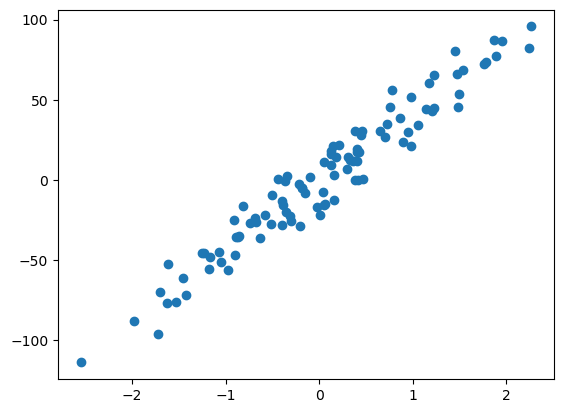

In [47]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée


In [48]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


In [49]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [50]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

# Modele Linéaire

In [51]:
def model(X, theta):
    return X.dot(theta)

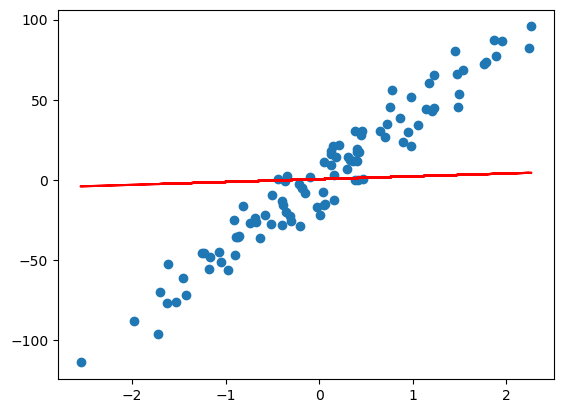

In [52]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# Fonction Cout : Erreur Quadratique moyenne

In [53]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)



In [54]:
cost_function(X, y, theta)

905.6306841935502

# Gradients et Descente de Gradient

In [55]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [56]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# Phase d'entrainement

In [57]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [58]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[42.61765864],
       [-0.81309274]])

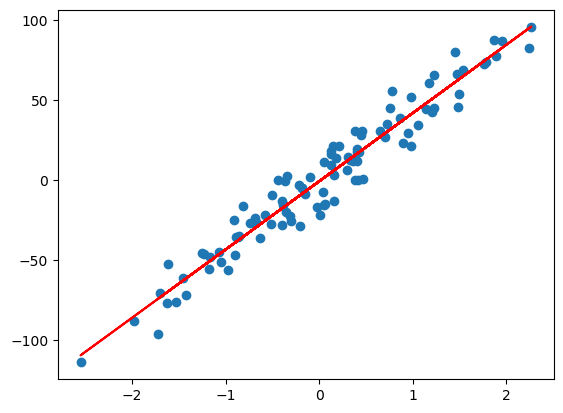

In [59]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# Courbes d'apprentissage

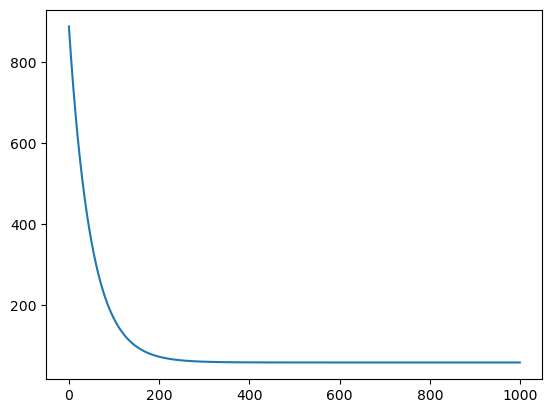

In [60]:
plt.plot(range(n_iterations), cost_history)

# Evaluation finale

In [62]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [63]:
coef_determination(y, predictions)

0.9417294706504984